# 포지션 추천 알고리즘 구현하기

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#1.-데이터-불러오기" data-toc-modified-id="1.-데이터-불러오기-1">1. 데이터 불러오기</a></span></li><li><span><a href="#2.-데이터-살펴보기" data-toc-modified-id="2.-데이터-살펴보기-2">2. 데이터 살펴보기</a></span><ul class="toc-item"><li><span><a href="#2.1-어떤-포지션이-많을까?" data-toc-modified-id="2.1-어떤-포지션이-많을까?-2.1">2.1 어떤 포지션이 많을까?</a></span></li><li><span><a href="#2.2-어느-회사에서-많이-뽑나?" data-toc-modified-id="2.2-어느-회사에서-많이-뽑나?-2.2">2.2 어느 회사에서 많이 뽑나?</a></span></li><li><span><a href="#2.3-어떤-산업-카테고리가-많을까?" data-toc-modified-id="2.3-어떤-산업-카테고리가-많을까?-2.3">2.3 어떤 산업 카테고리가 많을까?</a></span></li></ul></li></ul></div>

## 1. 데이터 불러오기

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')
import warnings
warnings.filterwarnings('ignore')
import tqdm

In [47]:
plt.rc('font', family = 'NanumGothic')
plt.rc('font', size = 13)

In [85]:
df = pd.read_csv('source/cute_penguins_1/wanted_raw.csv')
df.head(2)

,name,position,wanted_cat,about,roll,qual,pref,category,tags,link
0,룩인바디,[인바디 앱] Data Scientist,머신러닝 엔지니어,"인바디에서 2018년 분사 후, \n200만+ 사용자, 2,500만+ 인바디데이터의...",- 데이터 파이프라인 중 개선이 필요한 사항이 무엇인지 검토하고 개선안을 도출하여 ...,- 데이터 관련 업무를 1년 이상 수행하신 분\n- 주도적인 문제 해결의 경험이 있...,"- 룩인바디와 함께 성장하길 희망하며, 다양한 역할 수행에 대해 열려있는 분\n- ...","IT, 컨텐츠","['연봉업계평균이상', '인원급성장', '50명이하', '설립3년이하', '성과급'...",https://www.wanted.co.kr/wd/34549
1,투블럭에이아이,AI 자연어처리 관련 서비스 개발,머신러닝 엔지니어,최신 Deep NLP 기술의 현실 업무 적용의 경험을 통해서 인공지능과 업무자동화의...,"NLP 관련 기술개발 \nNER , MRC 등 Task 모듈 개발 \n데이터 정제 ...",• NP 관련 기술 Stack 보유자 (단순히 자연어처리에 관심이 있으신 분은 거절...,"• 전산학 석사 이상, 자연어처리 전공자 우대, 검색 포탈 경력자 우대\n• 유관 ...","IT, 컨텐츠","['인원급성장', '50명이하', '설립3년이하', '인공지능', 'IT, 컨텐츠']",https://www.wanted.co.kr/wd/44279


In [50]:
df.shape

(539, 10)

In [52]:
df.isnull().sum().sum()

0

## 2. 데이터 살펴보기

### 2.1 어떤 포지션이 많을까?
* 원티드에서 제공하는 카테고리로 간단하게 살펴보자.

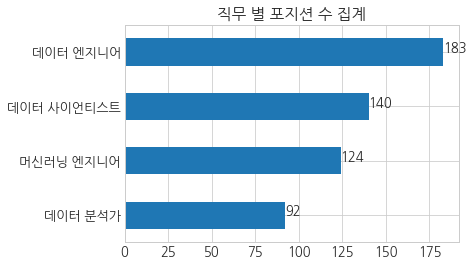

In [106]:
# 직무 집계
countposition = df.wanted_cat.value_counts().sort_values()
countposition.plot('barh', title='직무 별 포지션 수 집계')
for i, v in enumerate(countposition):
    plt.text(v, i, v)
plt.show()

* 데이터 엔지니어가 가장 많다.
* 나는 데이터 분석가를 준비하는데... 가장 적다ㅠ 쥬르륵
* 물론 회사마다 분석가-데.싸의 직무가 겹치는 경우가 있어서 결과를 봐야 알 듯!

### 2.2 어느 회사에서 많이 뽑나?
* 분석가를 많이 뽑는 회사들의 특징이 있을 것 같다.

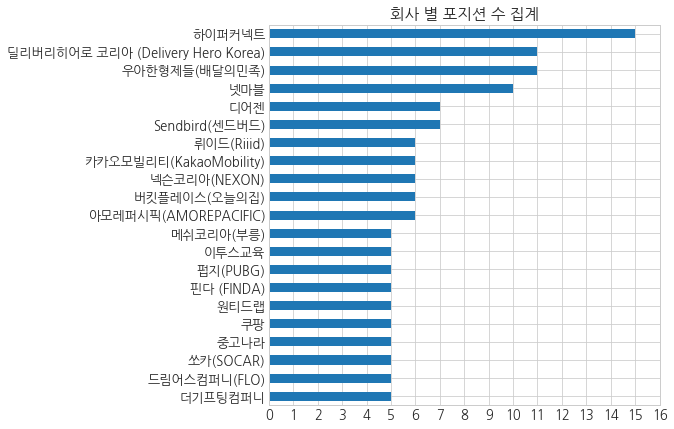

In [107]:
# 데이터 관련 포지션 5개 이상 있는 곳만 추리기
countcompany = df.name.value_counts()[df.name.value_counts()>=5].sort_values()
plt.figure(figsize=(7,7))
countcompany.plot('barh', title='회사 별 포지션 수 집계')
plt.xticks([val for val in range(17)])
plt.show()

* 하이퍼커넥트가 15군데로 가장 많다.
* 그 다음으로는 딜리버리히어로, 우아한형제들이 잇는다. 
    * 안 그래도 성장하고 있던 산업이, 코로나로 인해 더 커지면서 데이터가 기존보다 많이 쌓이고있을 것 같다.
    * 이것을 활용하기 위한 인력이 부족해서 뽑는것은 아닐까 혹시 그 자리가 내 자리일까 상상해본다.
* 인테리어 산업에서 성장하고있는 오늘의집도 보이고,
* 모빌리티 강자 쏘카와 카카오모빌리티도 보인다.
    * 모빌리티는 데이터가 쏟아진다고 알고있다.

### 2.3 어떤 산업 카테고리가 많을까?
* 원티드에 등록되어있는 카테고리라 범위가 넓긴 하겠지만 일단 살펴보자.

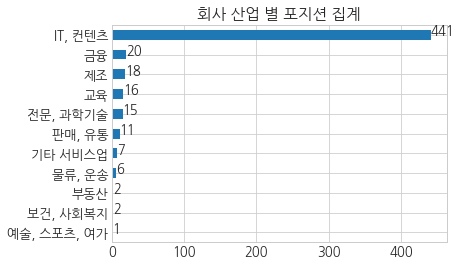

In [114]:
countcategory = df.category.value_counts().sort_values()
countcategory.plot('barh', title='회사 산업 별 포지션 집계')
for i, v in enumerate(countcategory):
    plt.text(v, i, v)
plt.show()

* 혹시나 했지만 역시나 IT분야가 가장 많다.
* 특이한 산업이 보이는데, 어떤 회사인지 찾아보자.
    1. 부동산
        * 직방, 다방일 것 같긴 한데 맞나?
    2. 보건, 사회복지
        * 어떤 회사일지 전혀 감이 안 온다.
    3. 예술, 스포츠, 여가
        * 역시 감이 안 온다.

In [138]:
df.query('category in ("보건, 사회복지", "부동산", "예술, 스포츠, 여가")')[['name', 'category']]\
.sort_values(by='category')

,name,category
83,올리브유니온(OliveUnion),"보건, 사회복지"
452,눔코리아(noom),"보건, 사회복지"
483,피터팬의 좋은방 구하기(PETERPANZ),부동산
484,피터팬의 좋은방 구하기(PETERPANZ),부동산
450,열정에기름붓기,"예술, 스포츠, 여가"


1. 부동산
    * 예상이 틀렸다. 피터팬의 좋은방 구하기였다! 오오
2. 보건, 사회복지
3. 예술, 스포츠, 여가
    * 내가 아는 그거 맞나
    